In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [3]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

In [4]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

### Plot

In [5]:
def plot_multi_tfs_sec_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        # variation
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        # second variation
        fin_sec_res_var = [None, None]
        for i in range(2, len(result)):
            fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
            
        res.append(fin_sec_res_var)
        labels.append(d[:-5])
        
        max_val = max(max_val, max(fin_sec_res_var[2:]))
    

    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Total Flow Size')
    plt.title('TFS Second Variation (Window Size = %d)' % (window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.ylim(top=max_val*1.2)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/1))

    # Show the plot
    plt.show()
    

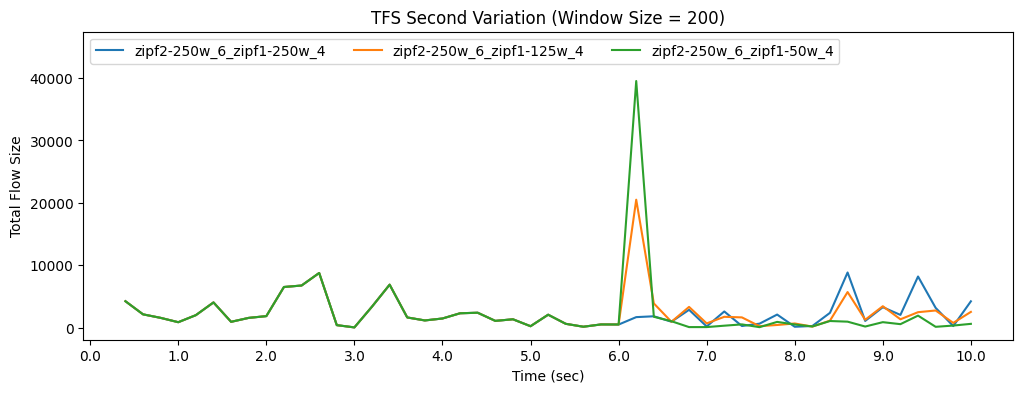

In [33]:
# plot_multi_tfs_sec_var(datasets=[pcap_file[88], pcap_file[89]])
plot_multi_tfs_sec_var(datasets=pcap_file[58:61])

### Predict

In [6]:
def changes_occured(var, sec_var, n, ws=20):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [7]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var3[name] = [None]
            res_sec_var3[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum3[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var3[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var3[name])):
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]])
        print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    

In [7]:
predict(width=widths, datasets=pcap_file[0:10], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[10:22], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[22:34], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[34:46], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[46:58], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[58:67], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[67:76], window_size=200, dev=3, ws=25)

# predict(width=widths, datasets=pcap_file[76:88], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[88:94], window_size=200, dev=3, ws=25)
# predict(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25)


0
caida-500w_10__4096
	Total Flow 
		 [None, None, 6615, 36129, 28284, 819, 314, 6116, 87, 636, 1074, 9990, 5717, 1634, 3644, 3363, 1630, 1551, 6035, 5751, 2698, 1456, 1890, 4139, 1165, 3075, 5059, 3337, 1263, 2427, 2500, 2300, 1251, 4330, 3296, 1811, 3201, 1792, 2646, 8952, 4252, 1601, 175, 2234, 1445, 11993, 3677, 1635, 35753]
		var: 9.4, ans: 10, change: 1
		sec var: 7.6, ans: 10, change: 1
		8952, max time: -1.0

1
caida-250w_10__4096
	Total Flow 
		 [None, None, 1001, 16191, 9812, 737, 1595, 994, 1787, 770, 2064, 834, 3548, 2491, 2077, 1757, 3688, 918, 4237, 982, 1014, 2347, 1164, 924, 141, 1632, 1426, 220, 231, 1594, 271, 1292, 2115, 3613, 4753, 2873, 5428, 2585, 820, 4896, 1978, 1084, 2793, 2110, 818, 1262, 1305, 1301, 19440]
		var: 9.4, ans: 10, change: 1
		sec var: 9.4, ans: 10, change: 1
		19440, max time: -1.0

2
caida-125w_10__4096
	Total Flow 
		 [None, None, 2186, 10283, 10021, 770, 399, 3058, 793, 942, 925, 1149, 573, 969, 2867, 531, 2805, 309, 372, 2628, 663, 1608, 1827

### Predict TFS value

In [8]:
def predict_tfs_val(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], 
                dataset='zipf2a_3_caida20180517_7.pcap', window_size=200, start_time=30, predict_length=2, 
                gt_dataset='caida0517-500w_10_.pcap'):
    

    res = []
    # sum
    gt_result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, gt_dataset, window_size)[-1] 
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)[start_time:]
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    

    actual_tfs = gt_result
    predict_tfs = sum(fin_res_var[1:min(len(fin_res_var), 1+int(predict_length*1000/window_size))]) * (10/predict_length)
    # print(actual_tfs, predict_tfs, abs(predict_tfs-actual_tfs))
    RE = round(abs(predict_tfs-actual_tfs)/actual_tfs, 2)
    
    return RE
    

In [9]:
def plot_tfs_val_err(predict_len = 2):
    
    all_datasets = caida + zipf2 + zipf1
    REs = []
    for a in all_datasets:
        single_REs = []
        for b in all_datasets:
            gt_dataset = f'{b}_10_.pcap'
            if a == b:
                dataset = f'{a}_10_.pcap'
                single_REs.append(predict_tfs_val(dataset=dataset, start_time=0, predict_length=predict_len, gt_dataset=gt_dataset))
            else:
                dataset = f'{a}_6_{b}_4.pcap'
                single_REs.append(predict_tfs_val(dataset=dataset, start_time=30, predict_length=predict_len, gt_dataset=gt_dataset))
            
        REs.append(single_REs)
    
    # indexs = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'C1', 'C2']
    # indexs = ['CAIDA-500w', 'CAIDA-250w', 'CAIDA-125w', 'CAIDA-50w', 'ZIPF2-250w', 'ZIPF2-125w', 'ZIPF2-50w', 'ZIPF1-250w', 'ZIPF1-125w', 'ZIPF1-50w']
    indexs = ['CA-500w', 'CA-250w', 'CA-125w', 'CA-50w', 'Z2-250w', 'Z2-125w', 'Z2-50w', 'Z1-250w', 'Z1-125w', 'Z1-50w']
    
    
    # Plot heatmap
    color = 'Blues'
    plt.figure(figsize=(10, 10))
    plt.imshow(REs, cmap=color , interpolation='nearest', vmax=0.20)

    # Add annotations for each cell
    for i in range(len(REs)):
        for j in range(len(REs[i])):
            plt.text(j, i, f'{REs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(indexs)), indexs, rotation=0)
    plt.yticks(np.arange(len(indexs)), indexs, rotation=0)
    

    plt.xlabel('Ending Dataset', fontsize=14)
    plt.ylabel('Starting Dataset', fontsize=14)
    plt.title('RE between est. and gt (predict length = %ss)' % (predict_len), fontsize=16)
    plt.colorbar(shrink=0.7)  # Add colorbar
    # for i, label in enumerate(all_datasets):
    #     plt.text(len(all_datasets)+3, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        
    
        
    plt.tight_layout()
    plt.show()   
        

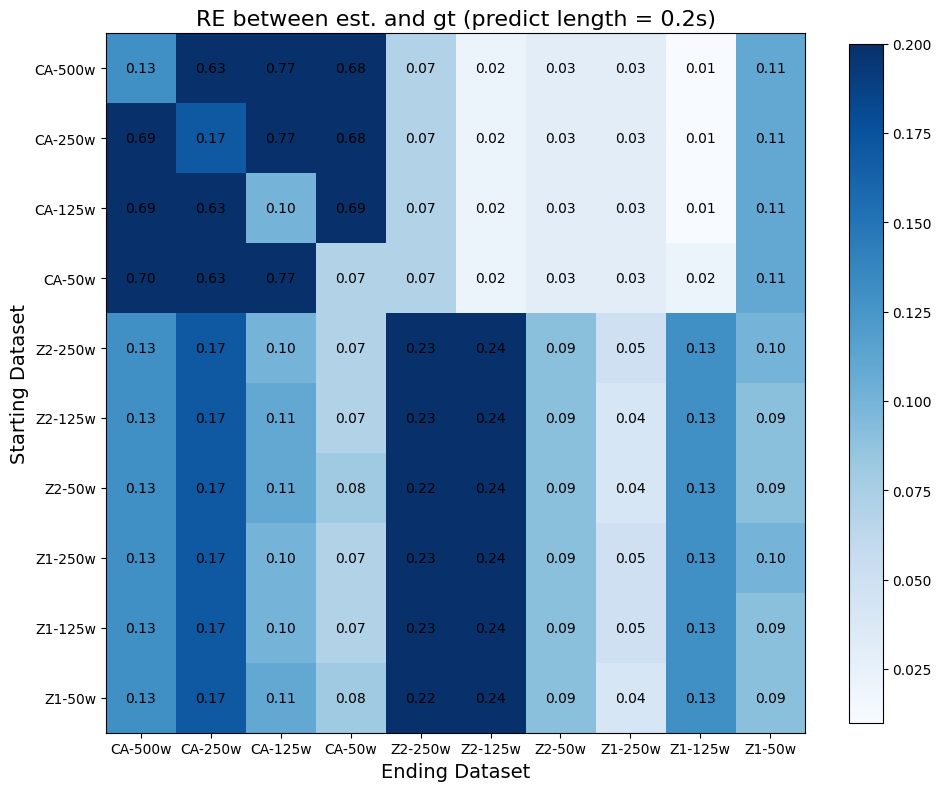

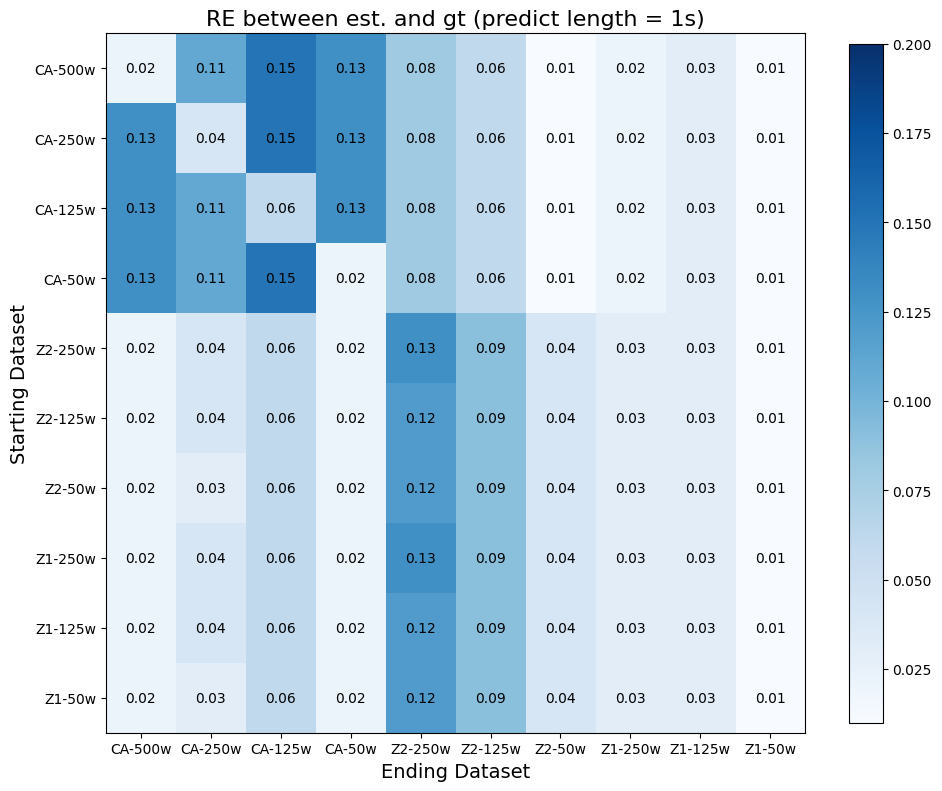

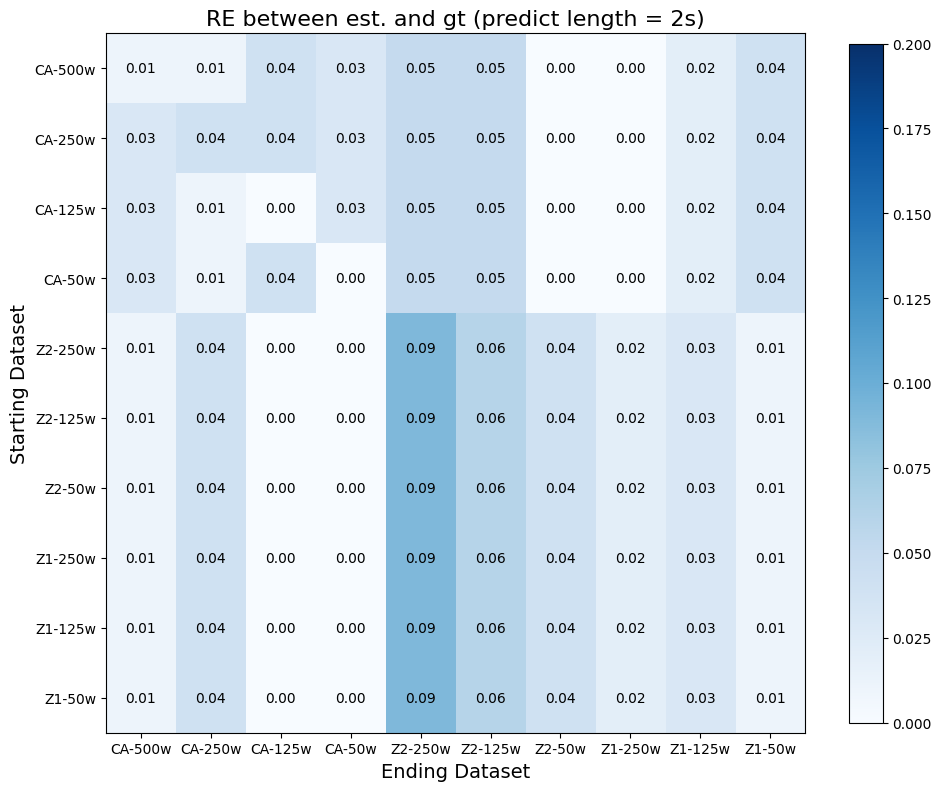

In [27]:
plot_tfs_val_err(0.2)
plot_tfs_val_err(1)
plot_tfs_val_err(2)

In [10]:
def predict_tfs(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', epochs=['10'], 
                dataset='zipf2a_3_caida20180517_7.pcap', window_size=200, start_time=30, predict_length=2, 
                gt_dataset='caida0517-500w_10_.pcap'):
    
    answer = {5000000: '500w',
              2500000: '250w', 
              1250000: '125w', 
              500000: '50w',
              }
    res = []
    # sum
    gt_result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, gt_dataset, window_size)[-1] 
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)[start_time:]
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    

    actual_tfs = gt_result
    predict_tfs = sum(fin_res_var[1:min(len(fin_res_var), 1+int(predict_length*1000/window_size))]) * (10/predict_length)
    
    closest_key = min(answer.keys(), key=lambda x: abs(x - predict_tfs))
    closest_value = answer[closest_key]
    
    return closest_value
    

In [11]:
def plot_tfs_val_choose(predict_len = 2):
    
    all_datasets = zipf1 + caida + zipf2
    REs = []
    for a in all_datasets:
        single_REs = []
        for b in all_datasets:
            gt_dataset = f'{b}_10_.pcap'
            if a == b:
                dataset = f'{a}_10_.pcap'
                single_REs.append(predict_tfs(dataset=dataset, start_time=0, predict_length=predict_len, gt_dataset=gt_dataset))
            else:
                dataset = f'{a}_6_{b}_4.pcap'
                single_REs.append(predict_tfs(dataset=dataset, start_time=30, predict_length=predict_len, gt_dataset=gt_dataset))
            
        REs.append(single_REs)
    
    indexs = ['zipf1\n250w', 'zipf1\n125w', 'zipf1\n50w', 'caida\n500w', 'caida\n250w', 'caida\n125w', 'caida\n50w', 'zipf2\n250w', 'zipf2\n125w', 'zipf2\n50w']
    # indexs = ['CAIDA-500w', 'CAIDA-250w', 'CAIDA-125w', 'CAIDA-50w', 'ZIPF2-250w', 'ZIPF2-125w', 'ZIPF2-50w', 'ZIPF1-250w', 'ZIPF1-125w', 'ZIPF1-50w']
    # indexs = ['CA-500w', 'CA-250w', 'CA-125w', 'CA-50w', 'Z2-250w', 'Z2-125w', 'Z2-50w', 'Z1-250w', 'Z1-125w', 'Z1-50w']
    
    # Plot heatmap
    color = 'Blues'
    result_mapping = {'500w': 3, '250w': 2, '125w': 1, '50w': 0}
    mapped_REs = np.vectorize(result_mapping.get)(REs)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(mapped_REs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(REs)):
        for j in range(len(REs[i])):
            plt.text(j, i, f'{REs[i][j]}', ha='center', va='center', color='black', fontsize=14)

    plt.xticks(np.arange(len(indexs)), indexs, rotation=0, fontsize=12)
    plt.yticks(np.arange(len(indexs)), indexs, rotation=0, fontsize=12)
    

    plt.xlabel('Ending Dataset', fontsize=14)
    plt.ylabel('Starting Dataset', fontsize=14)
    plt.title('RE between est. and gt (predict length = %ss)' % (predict_len), fontsize=16)
    cbar = plt.colorbar(shrink=0.7, ticks=np.arange(4))  # Add colorbar
    
    cbar.set_ticklabels(list(result_mapping.keys())[::-1])
    # for i, label in enumerate(all_datasets):
    #     plt.text(len(all_datasets)+3, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0) 
    
        
    plt.tight_layout()
    plt.show()   
        

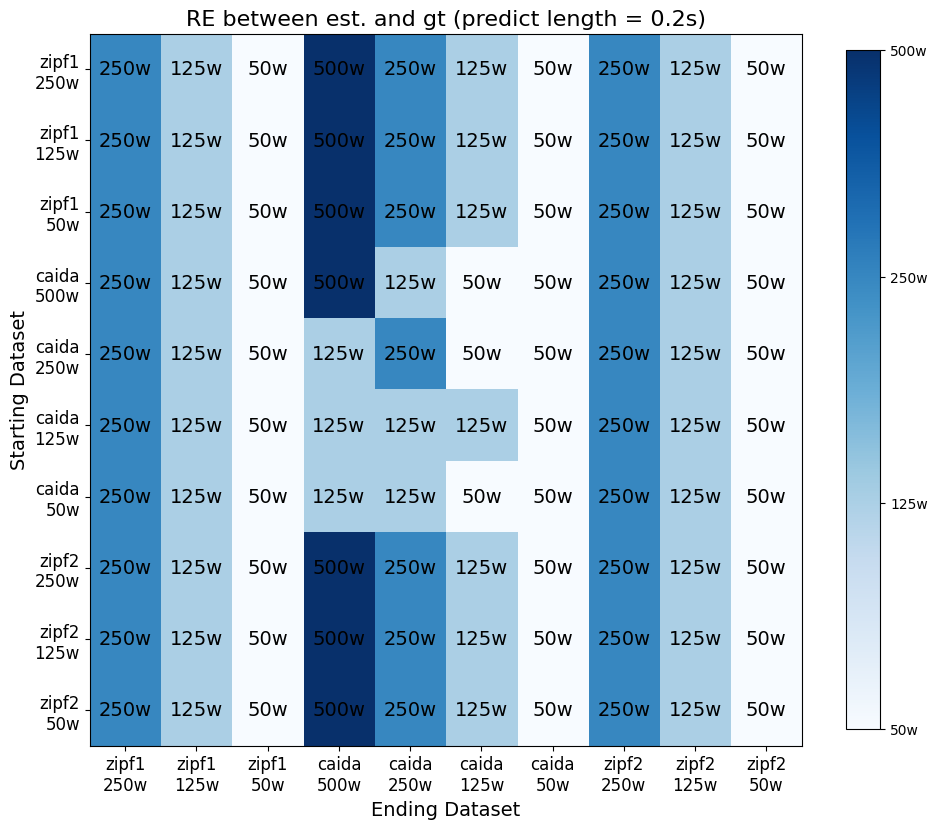

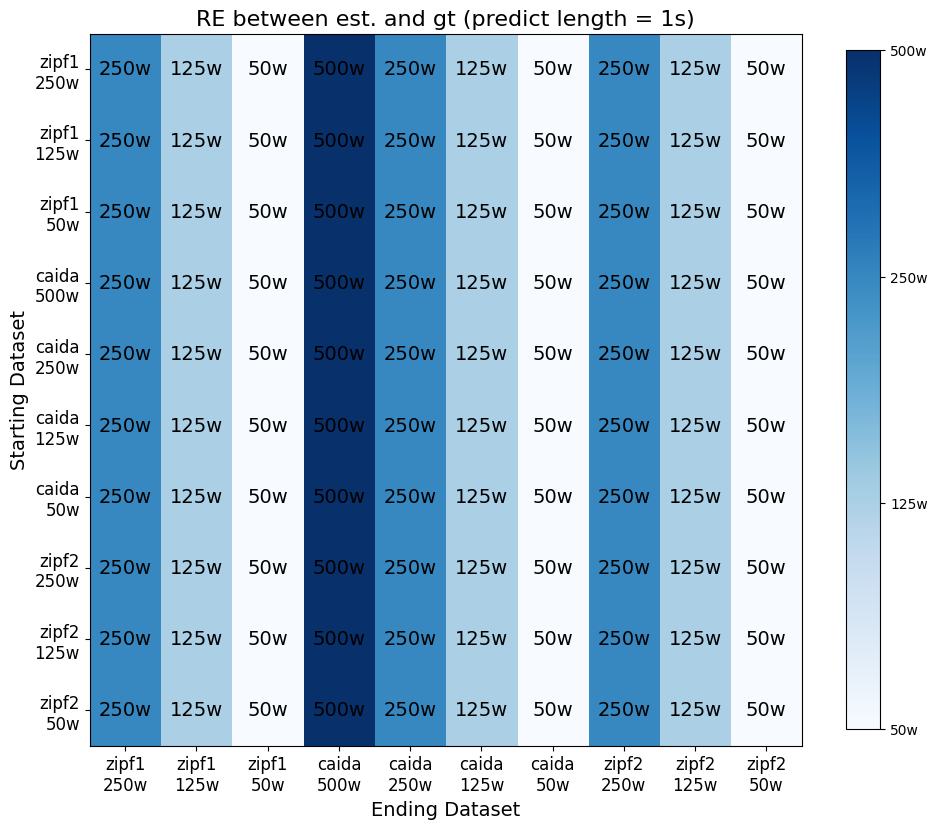

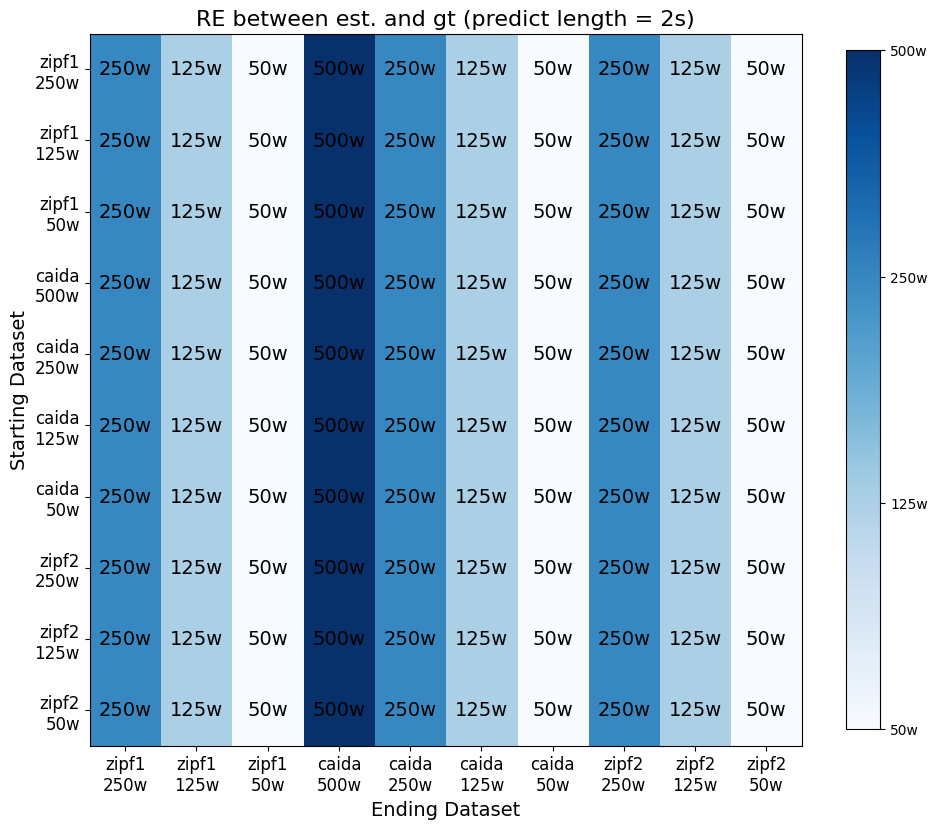

In [11]:
plot_tfs_val_choose(predict_len = 0.2)
plot_tfs_val_choose(predict_len = 1)
plot_tfs_val_choose(predict_len = 2)

---

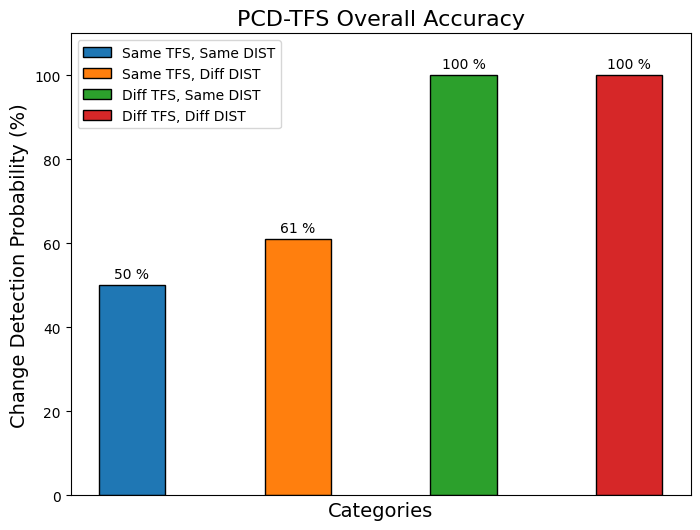

In [14]:
def plot_overall_acc(accuracies = [50, 61, 100, 100]):

    # Categories and their corresponding accuracies
    categories = ['Same TFS, Same DIST', 'Same TFS, Diff DIST', 'Diff TFS, Same DIST', 'Diff TFS, Diff DIST']


    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(categories, accuracies, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=categories, edgecolor='black')

    # Adding labels and title
    ax.set_xlabel('Categories', fontsize=14)
    ax.set_ylabel('Change Detection Probability (%)', fontsize=14)
    ax.set_title('PCD-TFS Overall Accuracy', fontsize=16)
    ax.set_ylim(0, 110)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks([])

    # Adding the text on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, yval+1, f'{yval} %', va='bottom', ha='center')  # va: vertical alignment

    plt.legend()
    plt.show()
    
plot_overall_acc()

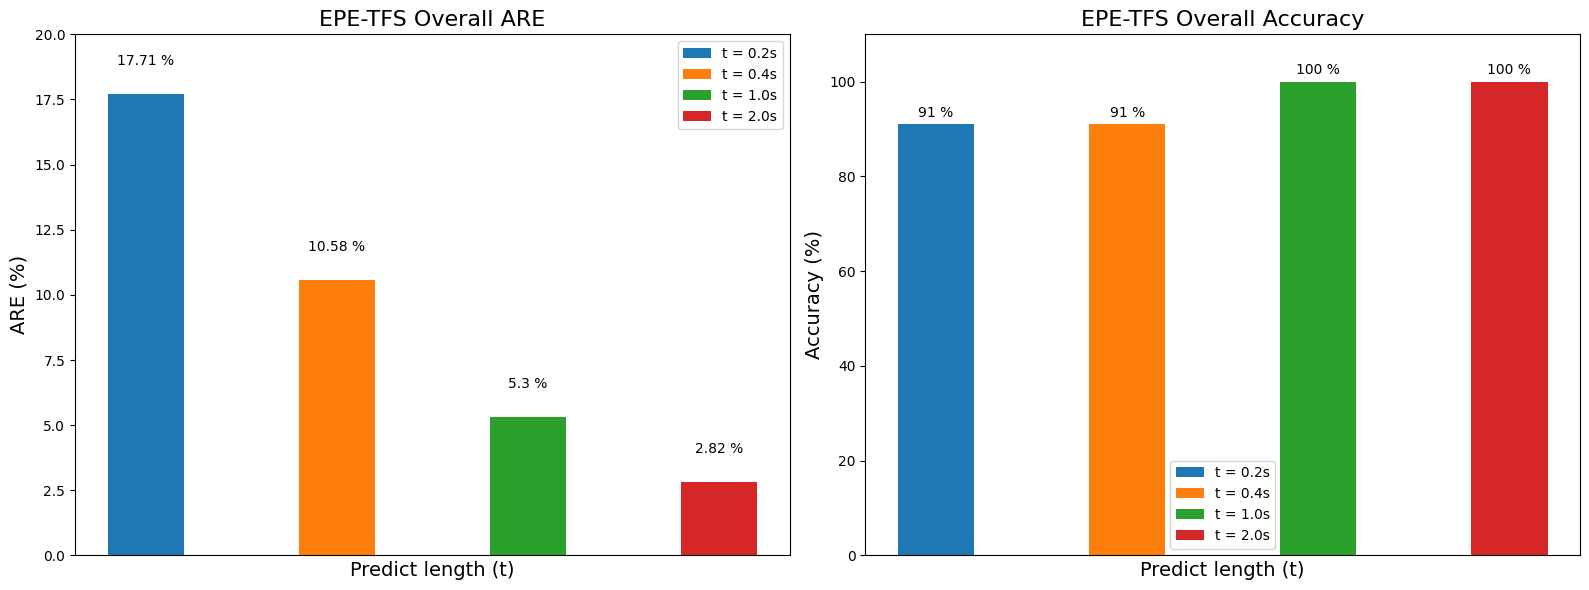

In [42]:
def plot_tfs_are_acc(len=[0.2, 0.4, 1.0, 2.0]):
    all_datasets = zipf1 + caida + zipf2
    # categories = ['Same TFS\nSame DIST', 'Same TFS\nDiff DIST', 'Diff TFS\nSame DIST', 'Diff TFS\nDiff DIST']
    
    res = []
    for l in len:
        AREs = 0.
        for a in all_datasets:
            for b in all_datasets:
                gt_dataset = f'{b}_10_.pcap'
                if a == b:
                    dataset = f'{a}_10_.pcap'
                    AREs += predict_tfs_val(dataset=dataset, start_time=0, predict_length=l, gt_dataset=gt_dataset)
                else:
                    dataset = f'{a}_6_{b}_4.pcap'
                    AREs += predict_tfs_val(dataset=dataset, start_time=30, predict_length=l, gt_dataset=gt_dataset)
                            
        res.append(round(AREs,2))
        
    acc = []
    for l in len:
        succ = 0
        for a in all_datasets:
            for b in all_datasets:
                gt_dataset = f'{b}_10_.pcap'
                if a == b:
                    dataset = f'{a}_10_.pcap'
                    pred = predict_tfs(dataset=dataset, start_time=0, predict_length=l, gt_dataset=gt_dataset)
                    if pred == a.split('-')[1]:
                        succ += 1
                else:
                    dataset = f'{a}_6_{b}_4.pcap'
                    pred = predict_tfs(dataset=dataset, start_time=30, predict_length=l, gt_dataset=gt_dataset)
                    if pred == b.split('-')[1]:
                        succ += 1
                            
        acc.append(succ)
    # plot 
        # Create a figure and two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # Plotting the first subplot
    bars1 = ax1.bar(np.arange(4), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax1.set_xlabel('Predict length (t)', fontsize=14)
    ax1.set_ylabel('ARE (%)', fontsize=14)
    ax1.set_title('EPE-TFS Overall ARE', fontsize=16)
    ax1.set_ylim(0, 20)  # Set y-axis limits to show percentages up to 100%
    ax1.set_xticks([])
    ax1.legend()

    # Adding the text on top of the bars
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x()+bar.get_width()/2, yval+1, f'{yval} %', va='bottom', ha='center')  # va: vertical alignment


    # Plotting the first subplot
    bars2 = ax2.bar(np.arange(4), acc, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax2.set_xlabel('Predict length (t)', fontsize=14)
    ax2.set_ylabel('Accuracy (%)', fontsize=14)
    ax2.set_title('EPE-TFS Overall Accuracy', fontsize=16)
    ax2.set_ylim(0, 110)  # Set y-axis limits to show percentages up to 100%
    ax2.set_xticks([])
    ax2.legend()

    # Adding the text on top of the bars
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x()+bar.get_width()/2, yval+1, f'{yval} %', va='bottom', ha='center')  # va: vertical alignment

    # Layout adjustment to prevent overlap
    
    plt.tight_layout()
    plt.show()
    
plot_tfs_are_acc()